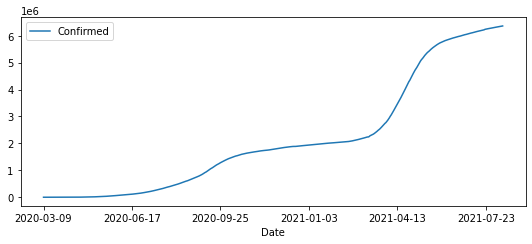

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.read_csv('covid_19_india.csv')

cases=df[["Date","State","Confirmed"]]

state=cases.loc[cases['State']== 'Maharashtra']

date=state.loc[state['Date'] > '2020-02-06'& state['Date'] > '2021-01-0']

date.set_index('Date').plot()

plt.show()

